In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# import dataframes
path = r'...'
orders_products_flagged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_flagged_4.8.pkl'))

In [3]:
orders_products_flagged.head()

,order_id,customer_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_order,spending_flag,days_since_prior_order_median,order_frequency_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,5.813559,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,5.813559,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,False,196,1,1,...,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,5.813559,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,5.813559,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,False,196,1,1,...,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,5.813559,Low spender,20.5,Non-frequent customer


<AxesSubplot:>

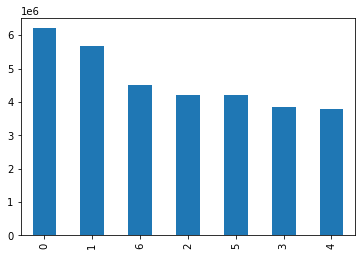

In [4]:
# bar chart
orders_products_flagged['order_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

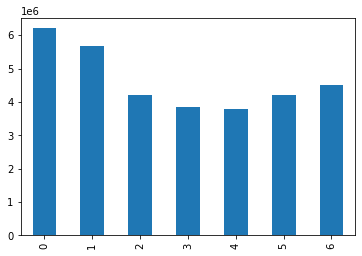

In [5]:
# bar chart - sorted
orders_products_flagged['order_day_of_week'].value_counts().sort_index().plot.bar()

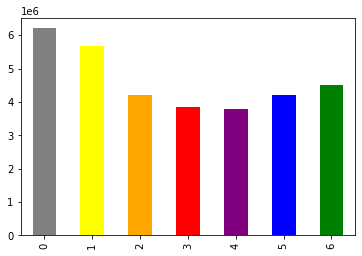

In [6]:
# bar chart - sorted and color coded
bar = orders_products_flagged['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['gray', 'yellow', 'orange', 'red', 'purple', 'blue', 'green'])

In [7]:
# export chart as png image
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<AxesSubplot:ylabel='Frequency'>

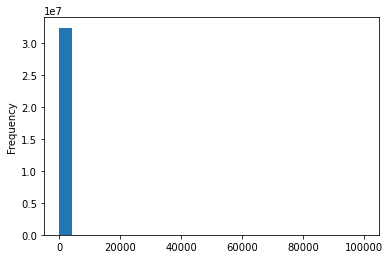

In [8]:
# create histogram
orders_products_flagged['prices'].plot.hist(bins = 25)

In [9]:
orders_products_flagged['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [10]:
orders_products_flagged['prices'].mean()

11.980225638467232

In [11]:
orders_products_flagged['prices'].median()

7.4

In [12]:
orders_products_flagged['prices'].max()

99999.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

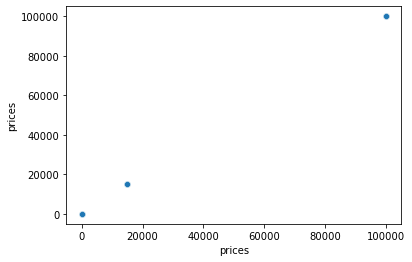

In [13]:
# create scatterplot
sns.scatterplot(x = 'prices', y = 'prices', data = orders_products_flagged)

In [14]:
# mark prizes over 100 as Nan
orders_products_flagged.loc[orders_products_flagged['prices'] >100, 'prices'] = np.nan

In [15]:
orders_products_flagged['prices'].max()

25.0

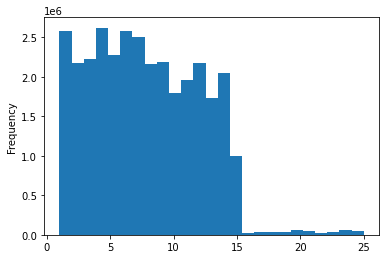

In [16]:
# check with histogram
histogram = orders_products_flagged['prices'].plot.hist(bins = 25)

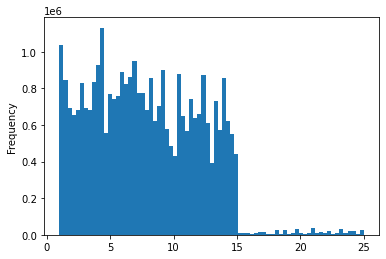

In [17]:
# more precise:
histogram = orders_products_flagged['prices'].plot.hist(bins = 75)

In [18]:
# export histogram
histogram.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_orders_prices.png'))

In [19]:
# create list
dev = np.random.rand(len(orders_products_flagged)) <= 0.7

In [20]:
# 70% of sample
big = orders_products_flagged[dev]

In [21]:
# 30% of sample
small = orders_products_flagged[~dev]

In [22]:
# df with only 'order_day_of_week' and 'prices' as columns
df_2 = small[['order_day_of_week','prices']]

In [23]:
# check
df_2.head()

,order_day_of_week,prices
1,3,9.0
3,4,9.0
5,2,9.0
10,1,9.0
20,3,9.0


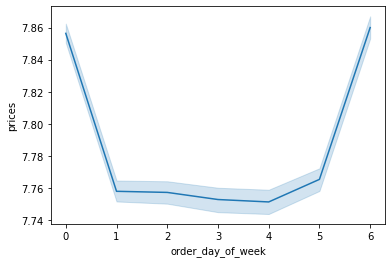

In [24]:
line = sns.lineplot(data = df_2, x = 'order_day_of_week', y = 'prices')